# **JB Link Telco Customer Churn**

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
# Algorithms for Base Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

## Load Data From CSV File

In [ ]:
df = pd.read_csv('telco_churn_data.csv')
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [ ]:
df.shape

(7043, 46)

## Data visualization and pre-processing

In [ ]:
df['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

terdapat customer yang tidak churn atau bernilai 0 berjumlah 5174 customer dan customer yang churn itu atau bernilai 1 berjumlah 1869

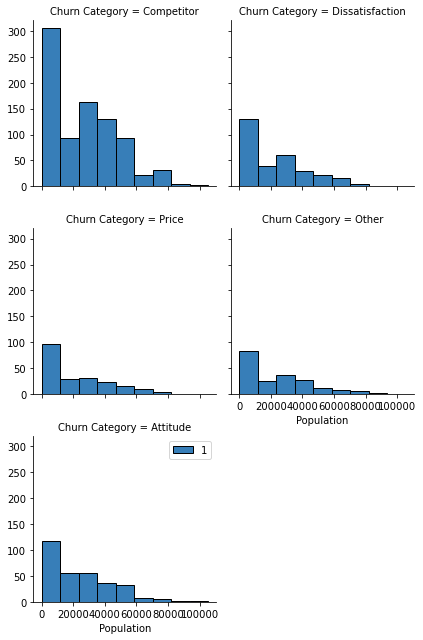

In [ ]:
import seaborn as sns

bins = np.linspace(df.Population.min(), df.Population.max(), 10)
g = sns.FacetGrid(df, col="Churn Category", hue="Churn Value", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Population',bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

count    7043.000000
mean        0.265370
std         0.441561
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn Value, dtype: float64
mode:  0    0
Name: Churn Value, dtype: int64
0    5174
1    1869
Name: Churn Value, dtype: int64


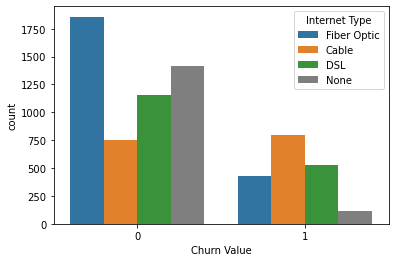

In [ ]:
# Feature Variable: Internet Type
c_palette = ['tab:blue', 'tab:orange','tab:green','tab:grey','tab:red','tab:brown']
categorical_summarized(df, x = 'Churn Value', hue='Internet Type', palette=c_palette)

count    7043.000000
mean        0.265370
std         0.441561
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn Value, dtype: float64
mode:  0    0
Name: Churn Value, dtype: int64
0    5174
1    1869
Name: Churn Value, dtype: int64


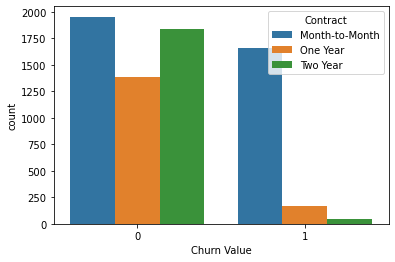

In [ ]:
# Feature Variable: Internet Type
c_palette = ['tab:blue', 'tab:orange','tab:green','tab:grey','tab:red','tab:brown']
categorical_summarized(df, x = 'Churn Value', hue='Contract', palette=c_palette)

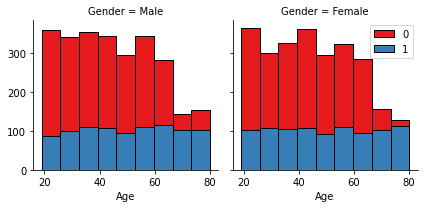

In [ ]:
bins = np.linspace(df.Age.min(), df.Age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="Churn Value", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

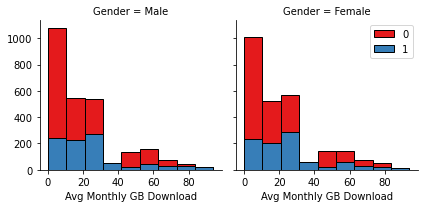

In [ ]:
# untuk numerik
bins = np.linspace(df['Avg Monthly GB Download'].min(), df['Avg Monthly GB Download'].max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="Churn Value", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Avg Monthly GB Download', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

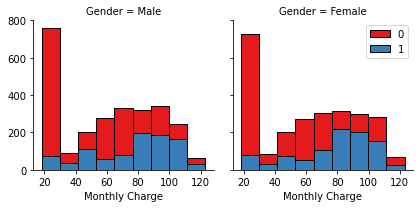

In [ ]:
# untuk numerik
bins = np.linspace(df['Monthly Charge'].min(), df['Monthly Charge'].max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="Churn Value", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Monthly Charge', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

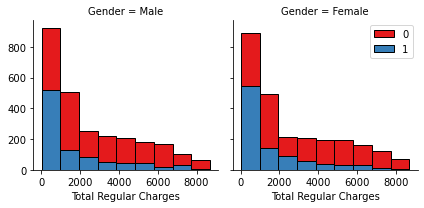

In [ ]:
# untuk numerik
bins = np.linspace(df['Total Regular Charges'].min(), df['Total Regular Charges'].max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="Churn Value", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Total Regular Charges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [ ]:
df.drop('Customer ID', axis=1, inplace=True)
df.drop('Churn Reason', axis=1, inplace=True)
df.drop('Churn Category', axis=1, inplace=True)
df.drop('Zip Code', axis=1, inplace=True)
df.drop('Latitude', axis=1, inplace=True)
df.drop('Longitude', axis=1, inplace=True)
df.drop('CLTV', axis=1, inplace=True)
df.drop('Customer Satisfaction', axis=1, inplace=True)
df.drop('City', axis=1, inplace=True)

In [ ]:
df.dtypes

Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless Billing                     object
Payment Method                        object
Monthly Charge                       float64
Total Regu

## Convert Categorical features to numerical values

In [ ]:
df.groupby(['Gender'])['Churn Value'].value_counts(normalize=True)

Gender  Churn Value
Female  0              0.730791
        1              0.269209
Male    0              0.738397
        1              0.261603
Name: Churn Value, dtype: float64

73 % of female Not Churn while only 73 % of males Not Churn

In [ ]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Population,Churn Value,Total Customer Svc Requests,Product/Service Issues Reported
0,No,0,1,None,No,0.00,No,Yes,Fiber Optic,9,...,78,No,Yes,No,No,0,68701,1,5,0
1,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,...,74,No,Yes,Yes,Yes,1,55668,1,5,0
2,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,...,71,No,Yes,No,Yes,3,47534,1,1,0
3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,...,78,No,Yes,Yes,Yes,1,27778,1,1,1
4,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,...,80,No,Yes,Yes,Yes,1,26265,1,1,0


In [ ]:
df.replace(to_replace=['Yes','No'], value=[0,1],inplace=True)
df.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Population,Churn Value,Total Customer Svc Requests,Product/Service Issues Reported
0,1,0,1,None,1,0.00,1,0,Fiber Optic,9,...,78,1,0,1,1,0,68701,1,5,0
1,0,1,8,Offer E,0,48.85,0,0,Cable,19,...,74,1,0,0,0,1,55668,1,5,0
2,1,0,18,Offer D,0,11.33,0,0,Fiber Optic,57,...,71,1,0,1,0,3,47534,1,1,0
3,0,1,25,Offer C,0,19.76,1,0,Fiber Optic,13,...,78,1,0,0,0,1,27778,1,1,1
4,0,1,37,Offer C,0,6.33,0,0,Cable,15,...,80,1,0,0,0,1,26265,1,1,0


In [ ]:
df.groupby(['Contract'])['Churn Value'].value_counts(normalize=True)

Contract        Churn Value
Month-to-Month  0              0.541551
                1              0.458449
One Year        0              0.892903
                1              0.107097
Two Year        0              0.974509
                1              0.025491
Name: Churn Value, dtype: float64

In [ ]:
df.groupby(['Internet Type'])['Churn Value'].value_counts(normalize=True)

Internet Type  Churn Value
Cable          1              0.516171
               0              0.483829
DSL            0              0.687500
               1              0.312500
Fiber Optic    0              0.811000
               1              0.189000
None           0              0.925950
               1              0.074050
Name: Churn Value, dtype: float64

In [ ]:
df.groupby(['Gender'])['Churn Value'].value_counts(normalize=True)

Gender  Churn Value
Female  0              0.730791
        1              0.269209
Male    0              0.738397
        1              0.261603
Name: Churn Value, dtype: float64

In [ ]:
df[['Tenure in Months','Internet Type','Contract','Churn Value','Age','Gender']].head()

,Tenure in Months,Internet Type,Contract,Churn Value,Age,Gender
0,1,Fiber Optic,Month-to-Month,1,78,Male
1,8,Cable,Month-to-Month,1,74,Female
2,18,Fiber Optic,Month-to-Month,1,71,Male
3,25,Fiber Optic,Month-to-Month,1,78,Female
4,37,Cable,Month-to-Month,1,80,Female


In [ ]:
f1 = df[['Referred a Friend','Number of Referrals','Tenure in Months','Phone Service','Avg Monthly Long Distance Charges','Multiple Lines','Internet Service','Avg Monthly GB Download','Online Security','Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Paperless Billing','Age','Senior Citizen','Married','Dependents']]
f1 = pd.concat([f1,pd.get_dummies(df['Internet Type'])], axis=1) # untuk dummies jgn pake variabel biner
f1 = pd.concat([f1,pd.get_dummies(df['Gender'])], axis=1)
f1 = pd.concat([f1,pd.get_dummies(df['Offer'])], axis=1)
f1 = pd.concat([f1,pd.get_dummies(df['Payment Method'])], axis=1)
f1 = pd.concat([f1,pd.get_dummies(df['Contract'])], axis=1)
#df.drop('Offer', axis=1, inplace=True)
#df.drop('Internet Type', axis=1, inplace=True)
#df.drop('Gender', axis=1, inplace=True)
#df.drop('Payment Method', axis=1, inplace=True)
#df.drop('Contract', axis=1, inplace=True)
#f1 = df.drop(['Churn Value'], axis=1, inplace=True)
f1.head()


,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Offer B,Offer C,Offer D,Offer E,Bank Withdrawal,Credit Card,Mailed Check,Month-to-Month,One Year,Two Year
0,1,0,1,1,0.00,1,0,9,1,1,...,0,0,0,0,1,0,0,1,0,0
1,0,1,8,0,48.85,0,0,19,1,0,...,0,0,0,1,0,1,0,1,0,0
2,1,0,18,0,11.33,0,0,57,1,1,...,0,0,1,0,1,0,0,1,0,0
3,0,1,25,0,19.76,1,0,13,1,0,...,0,1,0,0,1,0,0,1,0,0
4,0,1,37,0,6.33,0,0,15,1,1,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
list(f1.columns)

['Referred a Friend',
 'Number of Referrals',
 'Tenure in Months',
 'Phone Service',
 'Avg Monthly Long Distance Charges',
 'Multiple Lines',
 'Internet Service',
 'Avg Monthly GB Download',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Paperless Billing',
 'Age',
 'Senior Citizen',
 'Married',
 'Dependents',
 'Cable',
 'DSL',
 'Fiber Optic',
 'None',
 'Female',
 'Male',
 'None',
 'Offer A',
 'Offer B',
 'Offer C',
 'Offer D',
 'Offer E',
 'Bank Withdrawal',
 'Credit Card',
 'Mailed Check',
 'Month-to-Month',
 'One Year',
 'Two Year']

In [ ]:
X = f1
X[0:5]

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,...,Offer B,Offer C,Offer D,Offer E,Bank Withdrawal,Credit Card,Mailed Check,Month-to-Month,One Year,Two Year
0,1,0,1,1,0.00,1,0,9,1,1,...,0,0,0,0,1,0,0,1,0,0
1,0,1,8,0,48.85,0,0,19,1,0,...,0,0,0,1,0,1,0,1,0,0
2,1,0,18,0,11.33,0,0,57,1,1,...,0,0,1,0,1,0,0,1,0,0
3,0,1,25,0,19.76,1,0,13,1,0,...,0,1,0,0,1,0,0,1,0,0
4,0,1,37,0,6.33,0,0,15,1,1,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
df.dtypes

Referred a Friend                      int64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                          int64
Avg Monthly Long Distance Charges    float64
Multiple Lines                         int64
Internet Service                       int64
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                        int64
Online Backup                          int64
Device Protection Plan                 int64
Premium Tech Support                   int64
Streaming TV                           int64
Streaming Movies                       int64
Streaming Music                        int64
Unlimited Data                         int64
Contract                              object
Paperless Billing                      int64
Payment Method                        object
Monthly Charge                       float64
Total Regu

In [ ]:
# Change value in Churn Value into Yes and No
df['Churn Value'].replace(to_replace=[1,0], value=['Yes','No'],inplace=True)
df.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Population,Churn Value,Total Customer Svc Requests,Product/Service Issues Reported
0,1,0,1,None,1,0.00,1,0,Fiber Optic,9,...,78,1,0,1,1,0,68701,Yes,5,0
1,0,1,8,Offer E,0,48.85,0,0,Cable,19,...,74,1,0,0,0,1,55668,Yes,5,0
2,1,0,18,Offer D,0,11.33,0,0,Fiber Optic,57,...,71,1,0,1,0,3,47534,Yes,1,0
3,0,1,25,Offer C,0,19.76,1,0,Fiber Optic,13,...,78,1,0,0,0,1,27778,Yes,1,1
4,0,1,37,Offer C,0,6.33,0,0,Cable,15,...,80,1,0,0,0,1,26265,Yes,1,0


In [ ]:
y = df['Churn Value'].values
y[0:5]

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes'], dtype=object)

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.91827815, -0.65040855, -1.27898775,  3.05401039, -1.48630342,
         0.85417615, -0.52592737, -0.57816868,  0.63393298,  0.72556272,
        -1.38127743,  0.63943864,  0.79013171, -1.25617071,  0.73906221,
         0.78942072, -0.8297975 ,  1.88011037, -2.27315869,  0.96662231,
         0.54809324, -0.53032473, -0.55969412,  1.4402095 , -0.52592737,
        -0.99053183,  0.99053183,  0.90366519, -0.28234362, -0.36400163,
        -0.25022621, -0.30571841, -0.3592322 ,  0.89539912, -0.80012225,
        -0.24046865,  0.97517667, -0.53120365, -0.60408814],
       [-1.08899466, -0.31718476, -0.99374288, -0.32743831,  1.67611954,
        -1.17071871, -0.52592737, -0.10077299,  0.63393298, -1.3782406 ,
         0.72396752,  0.63943864,  0.79013171,  0.79607014,  0.73906221,
         0.78942072, -0.8297975 ,  1.64129246, -2.27315869, -1.03453023,
        -1.82450707,  1.88563714, -0.55969412, -0.69434343, -0.52592737,
         1.00955867, -1.00955867, -1.10660453, -0.28234362, -0.

In [ ]:
#Train Test Split Test.csv data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print ('Train set:', x_train.shape, y_train.shape )
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (4930, 39) (4930,)
Test set: (2113, 39) (2113,)


## Clasification

## K Nearest Neighbor(KNN

In [ ]:
#Import Library
from sklearn.neighbors import KNeighborsClassifier
#I have first started with k=4 and after I have calculated the k=7 with the accuracy optmisation of the testing data
k = 9
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=9)

In [ ]:
from sklearn import metrics

#Find the optimal k

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.78513961, 0.79744439, 0.80974917, 0.82063417, 0.82584004,
       0.82489352, 0.82725982, 0.83388547, 0.83483199])

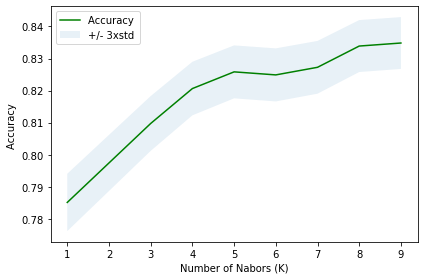

In [ ]:
#Plot accuracy for different k Values

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.8348319924278277 with k= 9


In [ ]:
#Train the model with all training data after have found the optimal K=9
k = 9
#Train Model
KNN_7 = KNeighborsClassifier(n_neighbors = k).fit(x_test,y_test)
KNN_7

KNeighborsClassifier(n_neighbors=9)

In [ ]:
pred_nb = KNN_7.predict(x_test)

In [ ]:
print(metrics.accuracy_score(y_test, pred_nb)*100)
print(confusion_matrix(y_test, pred_nb))
print(classification_report(y_test, pred_nb))

85.32891623284429
[[1364  160]
 [ 150  439]]
              precision    recall  f1-score   support

          No       0.90      0.90      0.90      1524
         Yes       0.73      0.75      0.74       589

    accuracy                           0.85      2113
   macro avg       0.82      0.82      0.82      2113
weighted avg       0.85      0.85      0.85      2113



## Decision Tree

In [ ]:
#Importing the library
from sklearn.tree import DecisionTreeClassifier
#Modelling ("entropy" or "gini")
decisiontree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decisiontree # it shows the default parameters
#Fitting the data X and y
decisiontree.fit (x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
pred_nb = decisiontree.predict(x_test)
print(metrics.accuracy_score(y_test, pred_nb)*100)
print(confusion_matrix(y_test, pred_nb))
print(classification_report(y_test, pred_nb))


82.0160908660672
[[1467   57]
 [ 323  266]]
              precision    recall  f1-score   support

          No       0.82      0.96      0.89      1524
         Yes       0.82      0.45      0.58       589

    accuracy                           0.82      2113
   macro avg       0.82      0.71      0.73      2113
weighted avg       0.82      0.82      0.80      2113



In [ ]:
confusion_matrix(y_test, pred_nb)

array([[1467,   57],
       [ 323,  266]], dtype=int64)

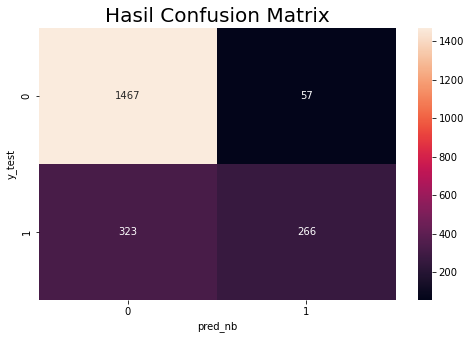

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, pred_nb), annot=True, fmt=".0f", ax=ax)
plt.title("Hasil Confusion Matrix", fontsize=20)
plt.xlabel("pred_nb")
plt.ylabel("y_test")
plt.show()

## Support Vector Machine

In [ ]:
#import the library
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)

SVC()

In [ ]:
pred_nb = clf.predict(x_test)
print(metrics.accuracy_score(y_test, pred_nb)*100)
print(confusion_matrix(y_test, pred_nb))
print(classification_report(y_test, pred_nb))

85.94415522953148
[[1421  103]
 [ 194  395]]
              precision    recall  f1-score   support

          No       0.88      0.93      0.91      1524
         Yes       0.79      0.67      0.73       589

    accuracy                           0.86      2113
   macro avg       0.84      0.80      0.82      2113
weighted avg       0.86      0.86      0.86      2113



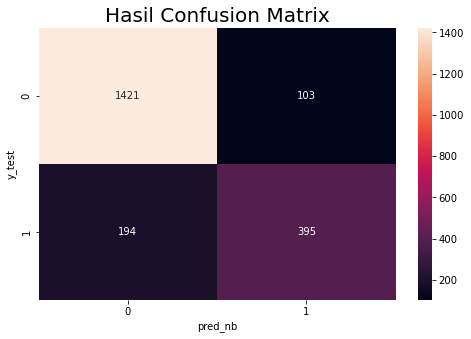

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, pred_nb), annot=True, fmt=".0f", ax=ax)
plt.title("Hasil Confusion Matrix", fontsize=20)
plt.xlabel("pred_nb")
plt.ylabel("y_test")
plt.show()

## Logistic Regression

In [ ]:
#Import the library
from sklearn.linear_model import LogisticRegression
#Modelling
LR = LogisticRegression(C=0.01, solver='liblinear', class_weight='balanced').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, class_weight='balanced', solver='liblinear')

In [ ]:
pred_nb = LR.predict(x_test)
print(metrics.accuracy_score(y_test, pred_nb)*100)
print(confusion_matrix(y_test, pred_nb))
print(classification_report(y_test, pred_nb))

81.96876478939896
[[1213  311]
 [  70  519]]
              precision    recall  f1-score   support

          No       0.95      0.80      0.86      1524
         Yes       0.63      0.88      0.73       589

    accuracy                           0.82      2113
   macro avg       0.79      0.84      0.80      2113
weighted avg       0.86      0.82      0.83      2113



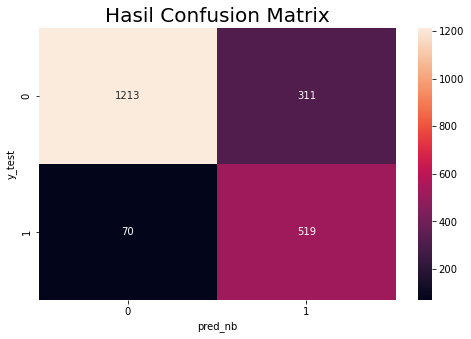

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, pred_nb), annot=True, fmt=".0f", ax=ax)
plt.title("Hasil Confusion Matrix", fontsize=20)
plt.xlabel("pred_nb")
plt.ylabel("y_test")
plt.show()

## GAUSSIAN NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

pred_nb = nb.predict(x_test)


In [ ]:
print(metrics.accuracy_score(y_test, pred_nb)*100)
print(confusion_matrix(y_test, pred_nb))
print(classification_report(y_test, pred_nb))

81.96876478939896
[[1213  311]
 [  70  519]]
              precision    recall  f1-score   support

          No       0.95      0.80      0.86      1524
         Yes       0.63      0.88      0.73       589

    accuracy                           0.82      2113
   macro avg       0.79      0.84      0.80      2113
weighted avg       0.86      0.82      0.83      2113



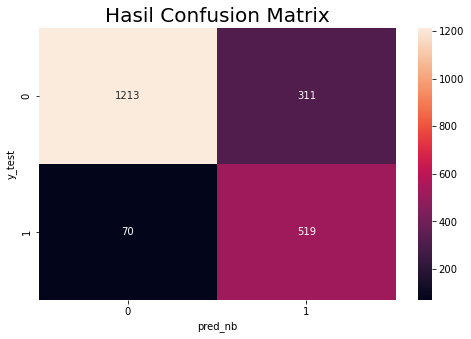

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, pred_nb), annot=True, fmt=".0f", ax=ax)
plt.title("Hasil Confusion Matrix", fontsize=20)
plt.xlabel("pred_nb")
plt.ylabel("y_test")
plt.show()

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# 6th Algorithm: Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)

In [ ]:
print(metrics.accuracy_score(y_test, pred_rf)*100)
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

85.89682915286323
[[1425   99]
 [ 199  390]]
              precision    recall  f1-score   support

          No       0.88      0.94      0.91      1524
         Yes       0.80      0.66      0.72       589

    accuracy                           0.86      2113
   macro avg       0.84      0.80      0.81      2113
weighted avg       0.86      0.86      0.85      2113



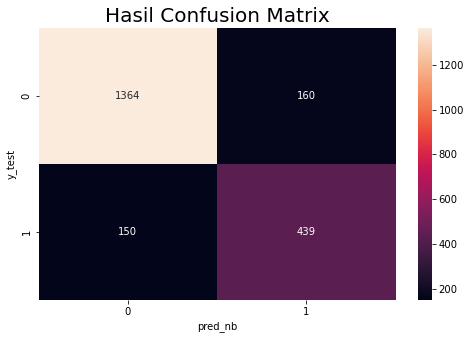

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, pred_nb), annot=True, fmt=".0f", ax=ax)
plt.title("Hasil Confusion Matrix", fontsize=20)
plt.xlabel("pred_nb")
plt.ylabel("y_test")
plt.show()

In [ ]:
rf.feature_importances_

array([0.01121751, 0.05872609, 0.11455713, 0.00625054, 0.07666214,
       0.01406613, 0.01213064, 0.07413011, 0.01789164, 0.0135707 ,
       0.0119316 , 0.01490946, 0.01447417, 0.011246  , 0.01280477,
       0.04089006, 0.01716669, 0.08428531, 0.01770662, 0.01136184,
       0.03068876, 0.04505238, 0.01122389, 0.01864058, 0.0117227 ,
       0.01287344, 0.01238009, 0.01266064, 0.00218216, 0.00564838,
       0.00343215, 0.00649616, 0.01197647, 0.01308032, 0.02030166,
       0.00721976, 0.0877525 , 0.01397405, 0.03671478])

In [ ]:
!pip3 install shap

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 7th Algorithm: Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
pred_gb = gb.predict(x_test)

In [ ]:
print(metrics.accuracy_score(y_test, pred_gb)*100)
print(confusion_matrix(y_test, pred_gb))
print(classification_report(y_test, pred_gb))

87.22195929957407
[[1435   89]
 [ 181  408]]
              precision    recall  f1-score   support

          No       0.89      0.94      0.91      1524
         Yes       0.82      0.69      0.75       589

    accuracy                           0.87      2113
   macro avg       0.85      0.82      0.83      2113
weighted avg       0.87      0.87      0.87      2113



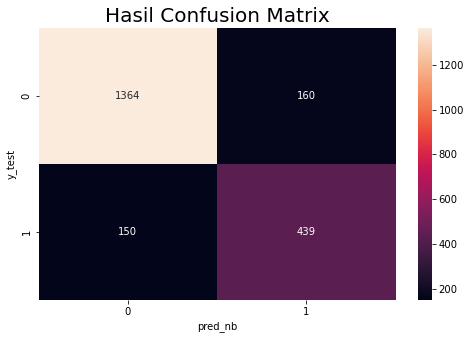

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, pred_nb), annot=True, fmt=".0f", ax=ax)
plt.title("Hasil Confusion Matrix", fontsize=20)
plt.xlabel("pred_nb")
plt.ylabel("y_test")
plt.show()

<AxesSubplot:>

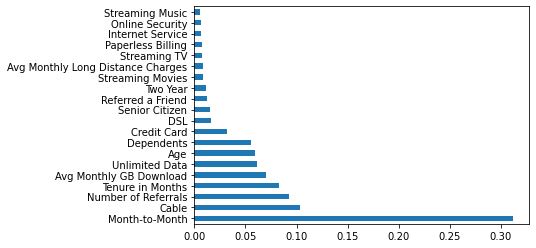

In [ ]:
feat_importances = pd.Series(gb.feature_importances_, index=f1.columns)
feat_importances.nlargest(20).plot(kind='barh')